In [8]:
def return_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        f.readline()
        sizeof_float = (int)(f.readline())
        
        f.readline()
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        
    return sizeof_float, TIME, dt, DTS

In [9]:
def set_data(file_to_read : str, field : list, sizeof_float : int):
    dtype = np.float32
    
    with open(file_to_read, 'br') as f:
        temp = np.fromfile(f, dtype=dtype, count=int(TIME/DTS))
        np.copyto(field, temp)

In [13]:
def set_a_whole_plot(field : dict):
    
    for name in field.keys():
        
        f = field[ name ]
        
        if ( '_s' not in name ):
            set_data( f['file_to_read'], f['data'], sizeof_float )
        else:
            f_s = field[name[:-2]]
            f['data'] = (f_s['data'])[ int((f['t_range'])[0]/DTS) : int((f['t_range'])[-1]/DTS+1) ]


In [23]:
def draw_a_whole_plot(fig, len_field, axes, field : dict):
    
    for name in field.keys():
        
        f = field[ name ]
        
        if (len_field == 1):
            ax = axes
        else:
            ax = axes[ f['axes_position'] ]
            
        
        ax.set_title( f['axes_name'] )
        if ( '_s' not in name ):
            ax.plot( f['t_range'], f['data'], color=f['color'] )
        else:
            f_s = field[name[:-2]]
            axes[ f_s['axes_position'] ].plot( f['t_range'], f['data'], color=f['color'] )
            axes[ f['axes_position'] ].plot( f['t_range'], f['data'], color=f['color'] )



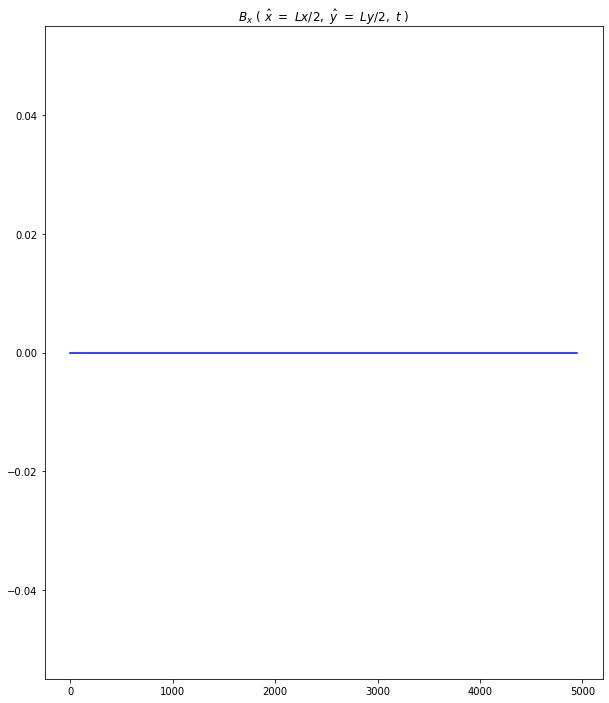

In [24]:
import matplotlib.pyplot as plt
import numpy as np

sizeof_float, TIME, dt, DTS = return_parameters('parameters.txt')

TINJ = 25000
TINJ_ = int(25000/DTS)

field = {
    'Bx'   : { 't_range': list(range(0, TIME, DTS)),
               'data': np.zeros(int(TIME/DTS)),
               'file_to_read' : 'Bx.bin',
               'axes_position' : 0,
               'axes_name': '$B_x\ (\ \hatx\ =\ Lx/2,\ \haty\ =\ Ly/2,\ t\ )$', 
               'color': 'blue',
             },
    #'Bx_s' : { 't_range': list(range(TINJ, TIME, DTS)),
    #           'data': [],
    #           'axes_position' : 1,
    #           'axes_name': '$B_x\ (\ \hatx\ =\ Lx/2,\ \haty\ =\ Ly/2,\ t[\ ' + str(TINJ) + ':\ ]\ )$', 
    #           'color': 'red',
    #         },
}

ncols = 1
nrows = 1
        
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,12))

set_a_whole_plot(field)
draw_a_whole_plot(fig, len(field), axes, field)

fig.savefig( "../" + str(list(field.keys())[0]) + "(0.5'Ly, 0.5'Ly, t).png")